In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, mean_squared_error

In [ ]:
pd.options.display.max_columns = None
//

In [3]:
math_data = pd.read_csv('student-mat.csv', sep=';')
port_data = pd.read_csv('student-por.csv', sep=';')

math_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [4]:
print(math_data.shape)
print("Giá trị thiếu trong dữ liệu:\n", math_data.isnull().sum())



(395, 33)
Giá trị thiếu trong dữ liệu:
 school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [5]:
names = math_data.columns.values.tolist()
print(names)
types = math_data.dtypes
print(types)

['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64


In [6]:
print(math_data.describe())
print(math_data.head())

              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.9988

STEP 1:DATA VISUALIZATION

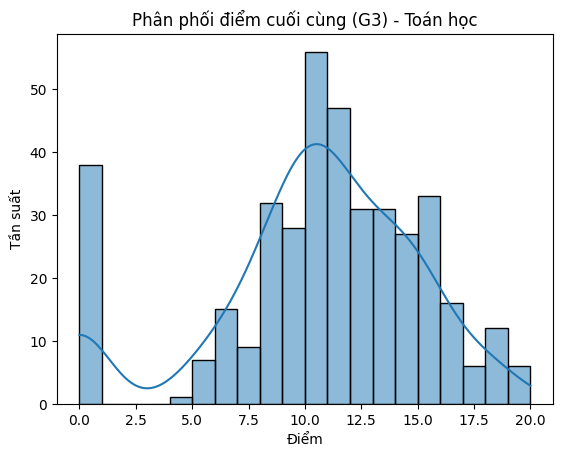

In [7]:
sns.histplot(math_data['G3'], bins=20, kde=True)
plt.title('Phân phối điểm cuối cùng (G3) - Toán học')
plt.xlabel('Điểm')
plt.ylabel('Tần suất')
plt.show()

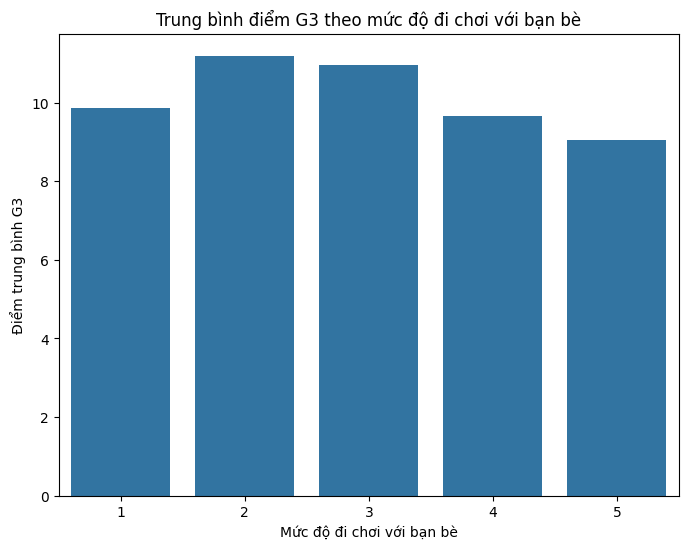

In [8]:

plt.figure(figsize=(8, 6))
sns.barplot(x='goout', y='G3', data=math_data, errorbar=None)
plt.title('Trung bình điểm G3 theo mức độ đi chơi với bạn bè')
plt.xlabel('Mức độ đi chơi với bạn bè')
plt.ylabel('Điểm trung bình G3')
plt.show()


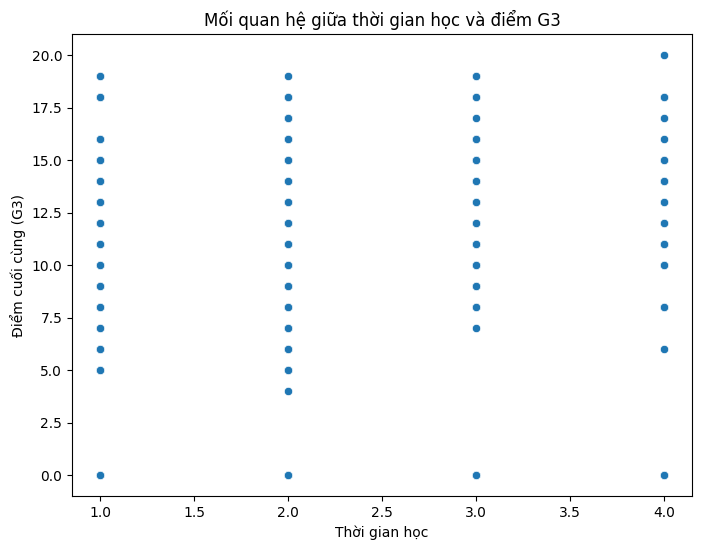

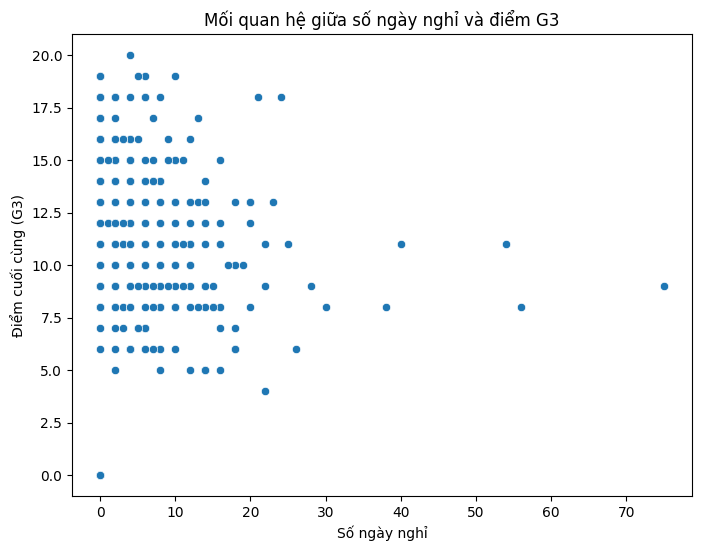

In [9]:
# Mối quan hệ giữa thời gian học và điểm số G3
plt.figure(figsize=(8, 6))
sns.scatterplot(x='studytime', y='G3', data=math_data)
plt.title('Mối quan hệ giữa thời gian học và điểm G3')
plt.xlabel('Thời gian học')
plt.ylabel('Điểm cuối cùng (G3)')
plt.show()

# Mối quan hệ giữa số ngày nghỉ và điểm số G3
plt.figure(figsize=(8, 6))
sns.scatterplot(x='absences', y='G3', data=math_data)
plt.title('Mối quan hệ giữa số ngày nghỉ và điểm G3')
plt.xlabel('Số ngày nghỉ')
plt.ylabel('Điểm cuối cùng (G3)')
plt.show()

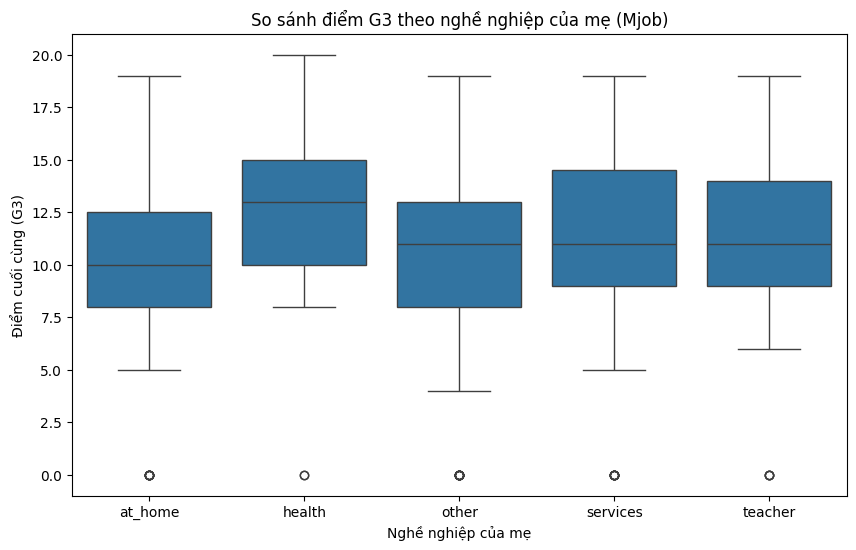

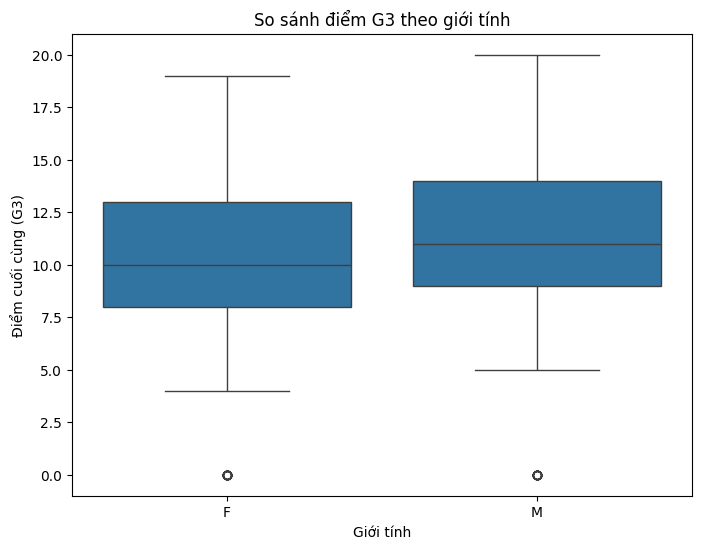

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# So sánh điểm G3 theo nghề nghiệp của mẹ (Mjob)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Mjob', y='G3', data=math_data)
plt.title('So sánh điểm G3 theo nghề nghiệp của mẹ (Mjob)')
plt.xlabel('Nghề nghiệp của mẹ')
plt.ylabel('Điểm cuối cùng (G3)')
plt.show()

# So sánh điểm G3 theo giới tính
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='G3', data=math_data)
plt.title('So sánh điểm G3 theo giới tính')
plt.xlabel('Giới tính')
plt.ylabel('Điểm cuối cùng (G3)')
plt.show()


STEP 2: DATA PREPARATION

In [11]:
# Kiểm tra thông tin về DataFrame
print("Thông tin về DataFrame:\n", math_data.info())
print("Dữ liệu đầu vào:\n", math_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [12]:
# Mã hóa các thuộc tính phân loại
categorical_cols = ['sex', 'school', 'address', 'Pstatus', 'Mjob', 'Fjob', 'guardian', 
                    'famsize', 'reason', 'schoolsup', 'famsup', 'activities', 
                    'paid', 'internet', 'nursery', 'higher', 'romantic']

# Kiểm tra xem các cột phân loại có tồn tại trong DataFrame không
existing_categorical_cols = [col for col in categorical_cols if col in math_data.columns]

# Mã hóa các cột phân loại
math_data = pd.get_dummies(math_data, columns=existing_categorical_cols, drop_first=True)
# Hiển thị dữ liệu đã được xử lý
print("Dữ liệu sau khi mã hóa:\n", math_data.head())

Dữ liệu sau khi mã hóa:
    age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   18     4     4           2          2         0       4         3      4   
1   17     1     1           1          2         0       5         3      3   
2   15     1     1           1          2         3       4         3      2   
3   15     4     2           1          3         0       3         2      2   
4   16     3     3           1          2         0       4         3      2   

   Dalc  Walc  health  absences  G1  G2  G3  sex_M  school_MS  address_U  \
0     1     1       3         6   5   6   6  False      False       True   
1     1     1       3         4   5   5   6  False      False       True   
2     2     3       3        10   7   8  10  False      False       True   
3     1     1       5         2  15  14  15  False      False       True   
4     1     2       5         4   6  10  10  False      False       True   

   Pstatus_T  Mjob_health  Mjob_other

In [13]:
# Chuẩn hóa các biến số
scaler = MinMaxScaler()
numerical_cols = ['age', 'Medu', 'Fedu', 'famrel', 'freetime', 'goout', 'Walc', 'Dalc', 
                'health', 'absences', 'G1', 'G2']
math_data[numerical_cols] = scaler.fit_transform(math_data[numerical_cols])

# Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra
X = math_data.drop(['G3'], axis=1)  # Tất cả các cột trừ G3
y_class = (math_data['G3'] >= 10).astype(int)  # Phân loại G3 (điểm >= 10)
y_reg = math_data['G3']  # Hồi quy G3

X_train, X_test, y_train_class, y_test_class, y_train_reg, y_test_reg = train_test_split(
    X, y_class, y_reg, test_size=0.2, random_state=42)

# Mô hình phân loại
log_reg_math = LogisticRegression(max_iter=200)
decision_tree_math = DecisionTreeClassifier()
random_forest_math = RandomForestClassifier()

# Huấn luyện mô hình phân loại
log_reg_math.fit(X_train, y_train_class)
decision_tree_math.fit(X_train, y_train_class)
random_forest_math.fit(X_train, y_train_class)

# Dự đoán và đánh giá
y_pred_log_math = log_reg_math.predict(X_test)
y_pred_tree_math = decision_tree_math.predict(X_test)
y_pred_forest_math = random_forest_math.predict(X_test)

# Báo cáo phân loại
print("Logistic Regression Classification Report (Math):\n", classification_report(y_test_class, y_pred_log_math))
print("Decision Tree Classification Report (Math):\n", classification_report(y_test_class, y_pred_tree_math))
print("Random Forest Classification Report (Math):\n", classification_report(y_test_class, y_pred_forest_math))

Logistic Regression Classification Report (Math):
               precision    recall  f1-score   support

           0       0.86      0.70      0.78        27
           1       0.86      0.94      0.90        52

    accuracy                           0.86        79
   macro avg       0.86      0.82      0.84        79
weighted avg       0.86      0.86      0.86        79

Decision Tree Classification Report (Math):
               precision    recall  f1-score   support

           0       0.81      0.81      0.81        27
           1       0.90      0.90      0.90        52

    accuracy                           0.87        79
   macro avg       0.86      0.86      0.86        79
weighted avg       0.87      0.87      0.87        79

Random Forest Classification Report (Math):
               precision    recall  f1-score   support

           0       0.83      0.93      0.88        27
           1       0.96      0.90      0.93        52

    accuracy                           0.

In [14]:
# Mô hình hồi quy
lin_reg_math = LinearRegression()
decision_tree_reg_math = DecisionTreeRegressor()
random_forest_reg_math = RandomForestRegressor()

# Huấn luyện mô hình hồi quy
lin_reg_math.fit(X_train, y_train_reg)
decision_tree_reg_math.fit(X_train, y_train_reg)
random_forest_reg_math.fit(X_train, y_train_reg)

# Dự đoán và đánh giá hồi quy
y_pred_lin_math = lin_reg_math.predict(X_test)
y_pred_tree_reg_math = decision_tree_reg_math.predict(X_test)
y_pred_forest_reg_math = random_forest_reg_math.predict(X_test)

# RMSE cho hồi quy
print("Linear Regression RMSE (Math):", mean_squared_error(y_test_reg, y_pred_lin_math, squared=False))
print("Decision Tree RMSE (Math):", mean_squared_error(y_test_reg, y_pred_tree_reg_math, squared=False))
print("Random Forest RMSE (Math):", mean_squared_error(y_test_reg, y_pred_forest_reg_math, squared=False))




Linear Regression RMSE (Math): 2.3783697847961376
Decision Tree RMSE (Math): 2.376040744653417
Random Forest RMSE (Math): 1.9509932556378309


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
